In [1]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

def image_invert_color(img):
    iimg = cv2.split(img);
    iimg = cv2.merge((iimg[2],iimg[1],iimg[0]))
    return iimg

def image_cut_border(img,l,r,t,d):
    img = img[l:img.shape[0]-r,t:img.shape[1]-d]
    if img.shape[0]%2==1:
        img = img[0:img.shape[0]-1,0:img.shape[1]]
    if img.shape[1]%2==1:
        img = img[0:img.shape[0],0:img.shape[1]-1]
    return img

def img_is_r_position(row,col): return ((row+1)%2 is 1and (col+1)%2 is 1)
def img_is_g_position_r_row(row,col): return ((row+1)%2 is 1 and (col+1)%2 is 0)
def img_is_g_position_b_row(row,col): return ((row+1)%2 is 0 and (col+1)%2 is 1)
def img_is_b_position(row,col): return ((row+1)%2 is 0 and (col+1)%2 is 0)



In [2]:
img = cv2.imread('img.jpg')
#img = reshape_img(img,0,0,0,0)
#img = cv2.imread("C:\\Users\\Mauro\\Desktop\\opencv\\sources\\samples\\data\\lena.jpg")
img = reshape_img(img,0,0,0,0)
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
plt.title("Original Image")
plt.imshow(invert_color(img))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

NameError: name 'reshape_img' is not defined

In [3]:
img.shape

(512, 512, 3)

In [4]:
def getPattern(offset_r,offset_c,img):
    H = img.shape[0]
    W = img.shape[1]    
    P = np.zeros((W,H))
    pr = [float((x+offset_r)%2) for x in range(2)]
    pr = np.tile(pr,int((W/2)))
    P = [pr*(i+offset_c)%2 for i in range(H)]
    return np.array(P)
    
%time r_pattern = getPattern(1,1,img)
%time b_pattern = getPattern(0,0,img)
%time g_pattern = getPattern(0,1,img)+getPattern(1,0,img)

#print(r_pattern)
#print(b_pattern)
#print(g_pattern)

def PSNR(img1,img2, border):
    img1 = img1.astype(np.float)
    img2 = img2.astype(np.float)
    MSE = 0.0
    for i in range(len(img1)-border)[border:]:
        for j in range(len(img1)-border)[border:]:
            MSE = MSE + np.linalg.norm(img1[i][j]-img2[i][j])       
    MSE = MSE/((len(img1)-6)*(len(img1)-6))
    PSNR = 20*np.log10(255/np.sqrt(MSE))
    return PSNR

def PSNRv(img1,img2,border):
    
    b1,g1,r1 = cv2.split(img1)
    b2,g2,r2 = cv2.split(img2)    
    
    print("Red Channel: ",PSNR(r1,r2,border),"dB")
    print("Green Channel: ",PSNR(g1,g2,border),"dB")
    print("Blue Channel: ",PSNR(b1,b2,border),"dB")
    print("Image: ",PSNR(img1,img2,border),"dB")
    return

Wall time: 12 ms
Wall time: 12 ms
Wall time: 24 ms


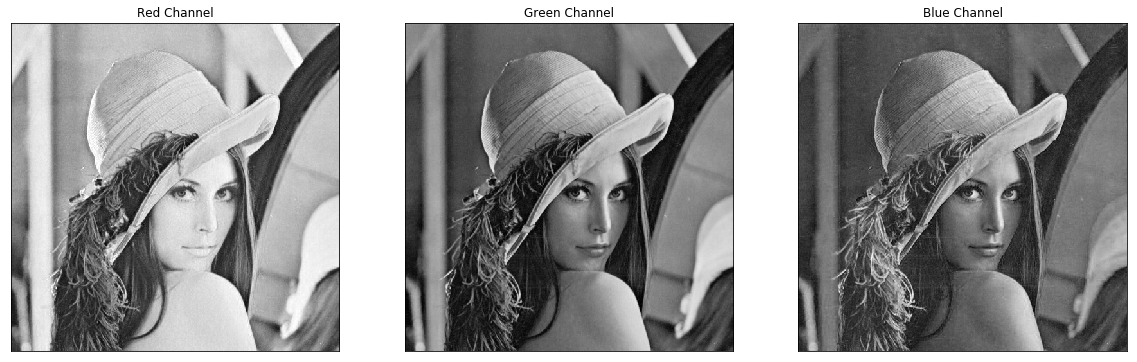

In [5]:
b,g,r = cv2.split(img)
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title("Red Channel")
#plt.imshow(r, cmap="Reds")
plt.imshow(r, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,2)
plt.title("Green Channel")
#plt.imshow(g, cmap="Greens")
plt.imshow(g, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,3)
plt.title("Blue Channel")
#plt.imshow(b, cmap="Blues")
plt.imshow(b, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

Wall time: 0 ns
Wall time: 4 ms
Wall time: 4 ms


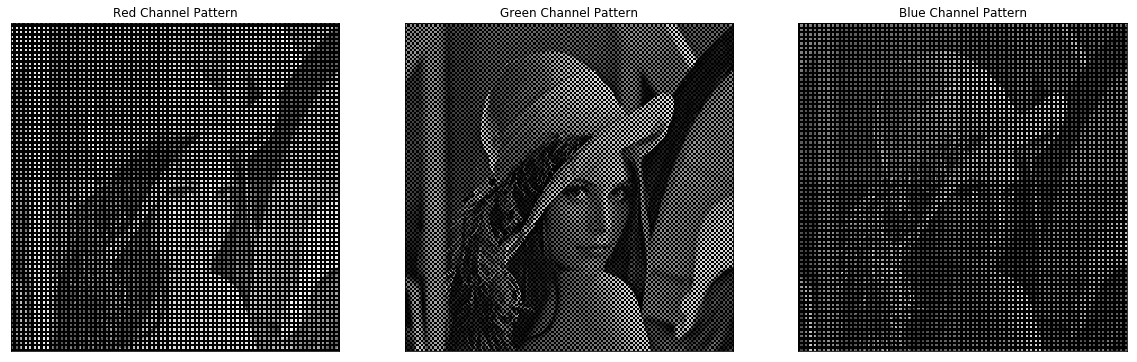

In [6]:
%time bp_r = r_pattern*r
%time bp_g = g_pattern*g
%time bp_b = b_pattern*b

#print(bp_r)
#print(bp_b)
#print(bp_g)


plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title("Red Channel Pattern")
plt.imshow(bp_r, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,2)
plt.title("Green Channel Pattern")
plt.imshow( bp_g, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,3)
plt.title("Blue Channel Pattern")
plt.imshow(bp_b, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [7]:
def fill_cross(matrix,shift_r,shift_c):
    
    matrixb = np.copy(matrix)
    
    irange = range(shift_r,matrix.shape[0]-1,2)
    jrange = range(shift_c,matrix.shape[1]-1,2)
    
    for i in irange:
        for j in jrange:
            matrixb[i,j] = (matrix[i+1,j+1] + matrix[i+1,j-1] + matrix[i-1,j+1] + matrix[i-1,j-1])/4
    return matrixb

Wall time: 128 ms
Wall time: 172 ms
Wall time: 0 ns


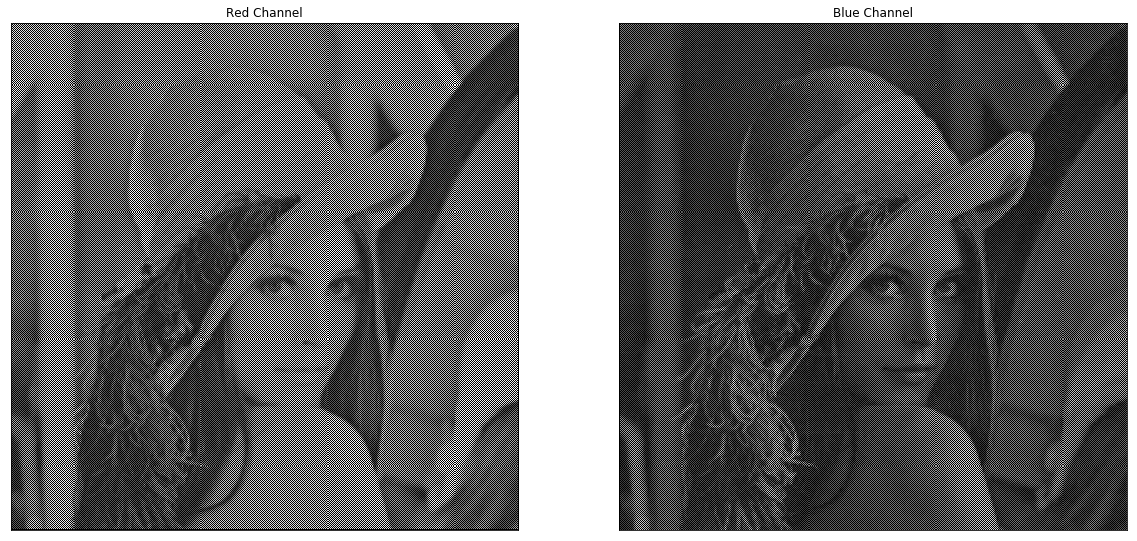

In [8]:
%time fc_bp_r = fill_cross(bp_r,1,1)
%time fc_bp_b = fill_cross(bp_b,2,2)
%time fc_bp_g = bp_g

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Red Channel")
plt.imshow(fc_bp_r, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.title("Blue Channel")
plt.imshow(fc_bp_b, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.show()


In [9]:
def fill_diag(matrix,shift_rp,shift_rd,shift_c_rp,shift_c_rd):
    
    matrixb = np.copy(matrix)
    
    irange = range(shift_rp,matrix.shape[0]-1,2)
    jrange = range(shift_c_rp,matrix.shape[1]-1,2)
    
    for i in irange:
        for j in jrange:
            matrixb[i][j] = (matrix[i+1][j]+ matrix[i-1][j]+ matrix[i][j+1]+ matrix[i][j-1])/4
            
    irange = range(shift_rd,matrix.shape[0]-1,2)
    jrange = range(shift_c_rd,matrix.shape[1]-1,2)
    
    for i in irange:
        for j in jrange:
            matrixb[i][j] = (matrix[i+1][j]+ matrix[i-1][j]+ matrix[i][j+1]+ matrix[i][j-1])/4
            
    return matrixb

Wall time: 300 ms
Wall time: 264 ms
Wall time: 292 ms


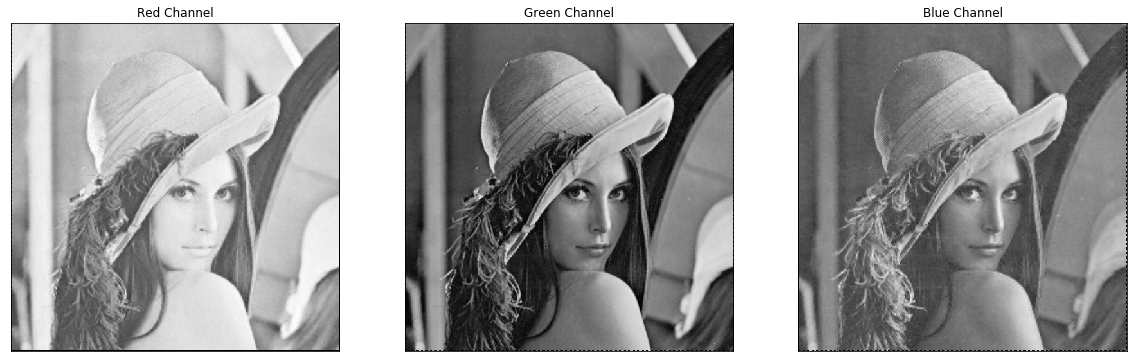

In [10]:
%time fd_bp_r = fill_diag(fc_bp_r,1,2,2,1)
%time fd_bp_b = fill_diag(fc_bp_b,2,3,3,2)
%time fd_bp_g = fill_diag(fc_bp_g,1,2,1,2)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title("Red Channel")
#plt.imshow(r, cmap="Reds")
plt.imshow(fd_bp_r, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,2)
plt.title("Green Channel")
#plt.imshow(g, cmap="Greens")
plt.imshow(fd_bp_g, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,3)
plt.title("Blue Channel")
#plt.imshow(b, cmap="Blues")
plt.imshow(fd_bp_b, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

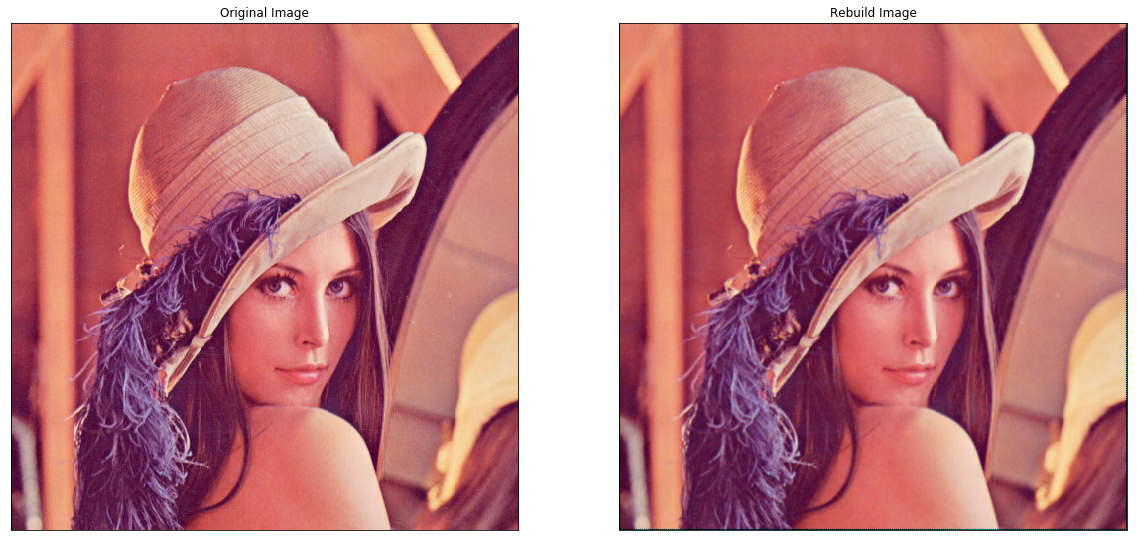

In [11]:
Ricostruzione = cv2.merge((fd_bp_b,fd_bp_g,fd_bp_r))
Ricostruzione = Ricostruzione.astype(np.uint8)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(invert_color(img))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,2,2)
plt.title("Rebuild Image")
plt.imshow(invert_color(Ricostruzione))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [12]:
PSNRv(img,Ricostruzione,5)

Red Channel:  43.3846827147 dB
Green Channel:  46.1172616701 dB
Blue Channel:  43.1734025922 dB
Image:  40.4400855654 dB


295.5
-7.25


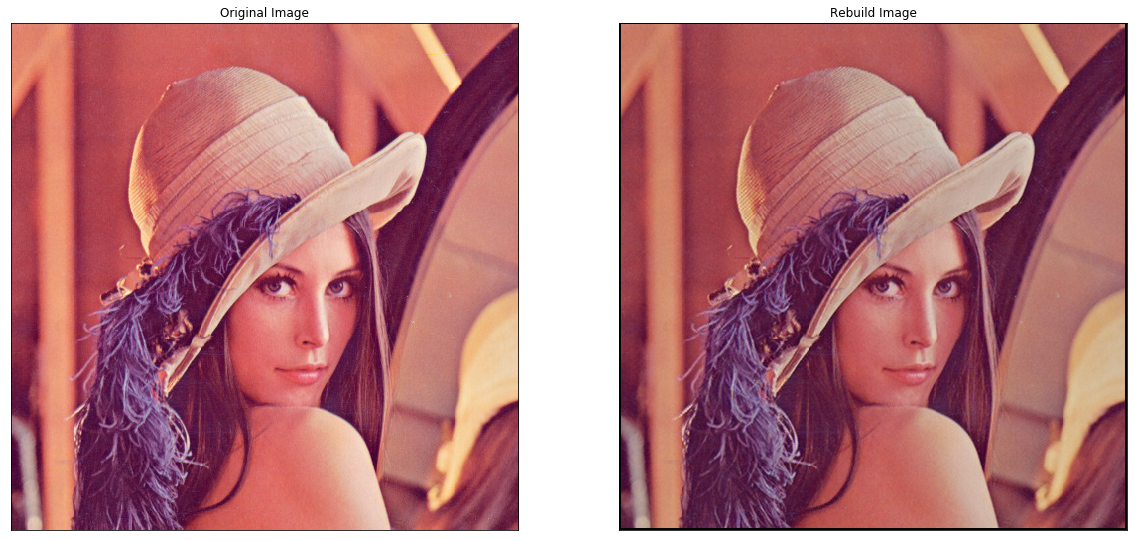

In [15]:
Seconda = np.zeros((img.shape[0],img.shape[1],img.shape[2]))

irange = range(img.shape[0]-2)[2:]
jrange = range(img.shape[1]-2)[2:]

alpha = (1.0/2)
beta = (5.0/8)
gamma = (3.0/4)

for i in irange:
    for j in jrange:
        if (i+1)%2 is 0:
            if (j+1)%2 is 0:
                #print(i,j)
                #BLUE@BLUE
                Seconda[i][j][0] = fd_bp_b[i][j]
                DeltaBlue = fd_bp_b[i][j]-(1.0/4)*(fd_bp_b[i+2][j]+fd_bp_b[i-2][j]+fd_bp_b[i][j+2]+fd_bp_b[i][j-2])
                #GREEN@BLUE
                #if fd_bp_g[i][j]+1*(alpha)*DeltaBlue <=255 and fd_bp_g[i][j]+1*(alpha)*DeltaBlue>=0:
                Seconda[i][j][1] = fd_bp_g[i][j]+1*(alpha)*DeltaBlue #+1db ch-green ma compaiono puntini verdi
                #RED@BLUE
                #if fd_bp_r[i][j]+1*(gamma)*DeltaBlue <=255 and fd_bp_r[i][j]+1*(gamma)*DeltaBlue>=0:
                Seconda[i][j][2] = fd_bp_r[i][j]+1*(gamma)*DeltaBlue #-0.06 ch-red e problemi al cappello
                
            if (j+1)%2 is 1: 
                #print(i,j)
                #GREEN@GREEN
                Seconda[i][j][1] = fd_bp_g[i][j]
                DeltaGreen = fd_bp_g[i][j]-(1.0/4)*(fd_bp_g[i+2][j]+fd_bp_g[i-2][j]+fd_bp_g[i][j+2]+fd_bp_g[i][j-2])
                #BLUE@GREEN@BLUEROW
                #if fd_bp_b[i][j]+1*(beta)*DeltaGreen <=255 and fd_bp_b[i][j]+1*(beta)*DeltaGreen>=0:
                Seconda[i][j][0] = fd_bp_b[i][j]+1*(beta)*DeltaGreen #+0.7db ch-blue
                #RED@GREEN@BLUEROW
                #if fd_bp_r[i][j]+1*(beta)*DeltaGreen <=255 and fd_bp_r[i][j]+1*(beta)*DeltaGreen>=0:
                Seconda[i][j][2] = fd_bp_r[i][j]+1*(beta)*DeltaGreen #-0.06 ch-red problemi al cappello
                
        if (i+1)%2 is 1:
            if (j+1)%2 is 0:
                #print(i,j)
                #GREEN@GREEN
                Seconda[i][j][1] = fd_bp_g[i][j]
                DeltaGreen = fd_bp_g[i][j]-(1.0/4)*(fd_bp_g[i+2][j]+fd_bp_g[i-2][j]+fd_bp_g[i][j+2]+fd_bp_g[i][j-2])
                #Seconda[i][j][1] = Ricostruzione[i][j][1]
                #BLUE@GREEN@REDROW
                #if fd_bp_b[i][j]+1*(beta)*DeltaGreen <=255 and fd_bp_b[i][j]+1*(beta)*DeltaGreen>=0:
                Seconda[i][j][0] = fd_bp_b[i][j]+1*(beta)*DeltaGreen #+0.61 ch-blue
                #RED@GREEN@REDROW
                #if fd_bp_r[i][j]+1*(beta)*DeltaGreen <=255 and fd_bp_r[i][j]+1*(beta)*DeltaGreen>=0:
                Seconda[i][j][2] = fd_bp_r[i][j]+1*(beta)*DeltaGreen #-0.06 ch-red e problemi al cappello

                
            if (j+1)%2 is 1:
                #print(i,j)
                #RED@RED
                Seconda[i][j][2] = fd_bp_r[i][j]
                DeltaRed = fd_bp_r[i][j]-(1.0/4)*(fd_bp_r[i+2][j]+fd_bp_r[i-2][j]+fd_bp_r[i][j+2]+fd_bp_r[i][j-2])
                #GREEN@RED
                #if fd_bp_g[i][j]+1*(alpha)*DeltaRed <=255 and fd_bp_g[i][j]+1*(alpha)*DeltaRed>=0:
                Seconda[i][j][1] = fd_bp_g[i][j]+1*(alpha)*DeltaRed #+1db ch-green anche se compaiono pixel verdi
                #BLUE@RED
                #if fd_bp_b[i][j]+1*(gamma)*DeltaRed <=255 and fd_bp_b[i][j]+1*(gamma)*DeltaRed>=0:
                Seconda[i][j][0] = fd_bp_b[i][j]+1*(gamma)*DeltaRed #+0.7db ch-blue

_max = 0;
_min = 0;

for i in range(Seconda.shape[0]):
    for j in range(Seconda.shape[1]):
        for k in range(Seconda.shape[2]):
            _max = max(Seconda[i,j,k],_max)
            _min = min(Seconda[i,j,k],_min)

for i in range(Seconda.shape[0]):
    for j in range(Seconda.shape[1]):
        for k in range(Seconda.shape[2]):
            Seconda[i,j,k] = ((Seconda[i,j,k]-_min)/_max)*255
            #if Seconda[i,j,k]>255: 
            #    Seconda[i,j,k] = ((Seconda[i,j,k])/_max)*255
            #if Seconda[i,j,k]<0: 
            #    Seconda[i,j,k] = ((Seconda[i,j,k])/_max)*255

print(_max) 
print(_min) 
Seconda = Seconda.astype(np.uint8)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(invert_color(img.astype(np.uint8)))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,2,2)
plt.title("Rebuild Image")
plt.imshow(invert_color(Seconda))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [14]:
PSNRv(img,Seconda,5)

Red Channel:  35.4145262195 dB
Green Channel:  38.7037692826 dB
Blue Channel:  38.6591474047 dB
Image:  34.4665533179 dB
